# Project - Natural Language Processing Project-1     PART-1
 by ARYAN JAIN

#### SUMMARY

<b>Context:</b>
      Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.
    
    
<b>Data Description:</b>    
    Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
    - 8240 "10s" blogs (ages 13-17),
    - 8086 "20s" blogs(ages 23-27)
    - 2994 "30s" blogs (ages 33-47)
For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus
    

<b>Domain:</b>
 Digital content management
    
    
<b>Objectives:</b>
    The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

## Importing required libraries

#### Data Management and Visualization

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### All required Libraries from skikit-learn

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer

#### NLP Performing Libraries

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()

#### Miscellaneous

In [4]:
import warnings
warnings.simplefilter("ignore")

In [6]:
# Loading in the dataset and checking the shape

df_blog_data = pd.read_csv("blogtext.csv")
df_blog_data.shape

(681284, 7)

In [7]:
# Investigating the first 5 rows

df_blog_data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
# Observations
    # Total records = 681284
    # For ease of computation, we will use 20,000 records of this dataset

In [10]:
# Creating the subset of 20K random records

df_blog_data_subset = df_blog_data.sample(20000, random_state=5)

In [34]:
# We can now delete the original variable to save memory
del df_blog_data

In [35]:
# Let's take a closer look at the data

df_blog_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 29489 to 457141
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  20000 non-null  object
 1   age     20000 non-null  int64 
 2   topic   20000 non-null  object
 3   sign    20000 non-null  object
 4   text    20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


**`Observations:`**
* `ID is just a unique identification number for the blogger, doesn't hold importance in finding the blog topic`
* `Date may influence a post's topic as if a certain event is going on, many bloggers are likely to write about it`
    * `I will drop date, though as it will just make a small change which will p=only be needed if we are actually implementing this`
* `Text seems to be the content of the blog post`
* `Other columns just give us information about the blogger`

In [13]:
# Dropping id and date columns, per comments written above
df_blog_data_subset.drop(['id','date'], axis=1, inplace=True)
df_blog_data_subset.head()

,gender,age,topic,sign,text
29489,male,17,indUnk,Pisces,"hello everyone, i said earlier that i w..."
629883,male,24,Engineering,Sagittarius,Happy happy~~!! Today is a happy day fo...
281010,male,17,Non-Profit,Gemini,"Heheh. Good heavens, childe. This sound..."
424094,male,25,Technology,Aries,...and it arrives today?! My l...
245647,male,38,Arts,Taurus,A PLACE IN THE SUN (1951) Direct...


In [14]:
# Checking if any nulls
df_blog_data_subset.isna().any()

gender    False
age       False
topic     False
sign      False
text      False
dtype: bool

**`Observations:`**
* `The data set has no missing values`

In [15]:
# Let's check distribution for the numeric attribute - Age

In [16]:
# Age is the only numerical variable so the default describe function will just return the information about the age column
df_blog_data_subset.describe() 

,age
count,20000.000000
mean,23.918700
std,7.793852
min,13.000000
25%,17.000000
50%,24.000000
75%,27.000000
max,48.000000


In [27]:
# Let's visualize

<AxesSubplot:xlabel='age', ylabel='count'>

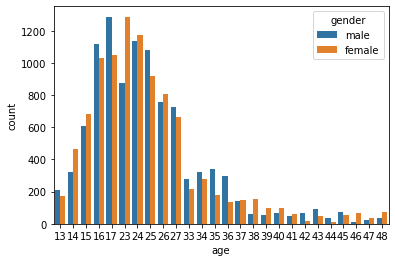

In [28]:
# Countplot of age with respect to gender
sns.countplot(x="age", hue="gender", data=df_blog_data_subset) 

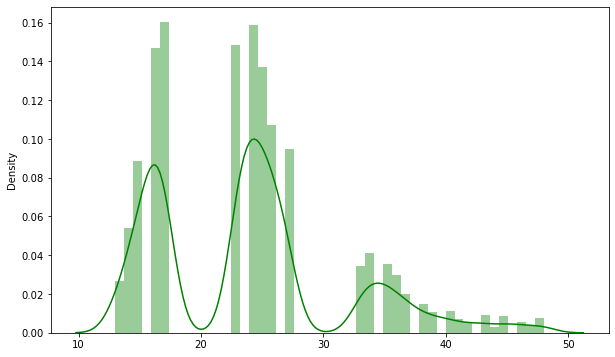

In [29]:
# Let's visualize
plt.figure(figsize=(10, 6))
sns.distplot(x=df_blog_data_subset["age"], color="g"); # Cleaner distribution plot of age

**`Observations:`**
* `Most bloggers appear to be between 16-30 yeard old`

<AxesSubplot:xlabel='gender', ylabel='count'>

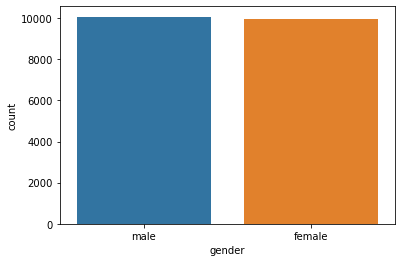

In [30]:
# Let's see the distribution of blogers by their gender
sns.countplot(x="gender", data=df_blog_data_subset)

In [31]:
df_blog_data_subset["gender"].value_counts()

male      10066
female     9934
Name: gender, dtype: int64

**`Observations:`**
* `There are slightly more male bloggers than female bloggers, the difference is around 100`

In [36]:
# Let's see what topic bloggers are typically writing about
df_blog_data_subset["topic"].value_counts()

indUnk                     7299
Student                    4557
Technology                 1243
Arts                        988
Education                   892
Communications-Media        588
Internet                    477
Non-Profit                  405
Engineering                 314
Law                         280
Government                  221
Publishing                  220
Science                     210
Religion                    164
Fashion                     157
Consulting                  157
Advertising                 150
Marketing                   149
BusinessServices            133
Telecommunications          123
Banking                     114
Accounting                  110
Sports-Recreation           108
Chemicals                   106
Museums-Libraries            97
Military                     90
RealEstate                   88
HumanResources               78
Transportation               64
Manufacturing                62
LawEnforcement-Security      51
Architec

In [41]:
# Let's check some information about the entire dataset in a pivot table
# We are just displaying the variables that have an object datatype
df_blog_data_subset.describe(include = np.object)

,gender,topic,sign,text
count,20000,20000,20000,20000
unique,2,40,12,19788
top,male,indUnk,Libra,urlLink
freq,10066,7299,1897,17


In [42]:
# Total blogs we picked = 20,000
# No. of unique topics written in these blogs = 40
# Male blogger = 10,066 and remaining are female

In [43]:
# Let's perform some data pre-processing
# We will
    # Remove unwanted characters
    # Remove spaces and stop words
    # Convert text to lowercase

In [67]:
# Removing the non-alphabetical characters
df_blog_data_subset['clean_data'] = df_blog_data_subset['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [68]:
# Making all the characters lowercase
df_blog_data_subset['clean_data']=df_blog_data_subset['clean_data'].apply(lambda x: x.lower())

In [69]:
# Removing any extra spaces at the beginning or end of the post
df_blog_data_subset['clean_data']=df_blog_data_subset['clean_data'].apply(lambda x: x.strip())

In [70]:
# Resetting the indices of the dataframe
df_blog_data_subset.reset_index(drop=True, inplace=True)

In [71]:
# Let's check how an example of the original posts looked like
print("Original Data = \n{}".format(df_blog_data_subset['text'][10]))

Original Data = 
        i haven't seen this movie, but just the ad alone is enough to make me want to pay full admission at the theater....      urlLink    Caption reads: Even sworn enemies can agree on one thing, Napoleon Dynamite is totally cool!  urlLink             


In [72]:
# Let's see how pre-processed data look after cleaning:

print("Cleansed Data = \n{}".format(df_blog_data_subset['clean_data'][10]))

Cleansed Data = 
i haven t seen this movie but just the ad alone is enough to make me want to pay full admission at the theater urllink caption reads even sworn enemies can agree on one thing napoleon dynamite is totally cool urllink


In [75]:
# We can see that there is "urllink" in the post as well, I think this means that there is a link where that is
# Let's remove this as it won't help our model and may even cause overfitting!
df_blog_data_subset['clean_data'] = df_blog_data_subset['clean_data'].apply(lambda x: re.sub(r'urllink','',x))

In [76]:
# Let's see how the data finally looks

print("Cleansed Data = \n{}".format(df_blog_data_subset['clean_data'][10]))

Cleansed Data = 
i haven t seen this movie but just the ad alone is enough to make me want to pay full admission at the theater   caption reads even sworn enemies can agree on one thing napoleon dynamite is totally cool  


Let's Remove StopWords

In [77]:
# Per comments written above, removing stop words 

In [78]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_blog_data_subset['clean_data'] = df_blog_data_subset['clean_data'].apply(lambda x : remove_stopwords(x))

[nltk_data] Downloading package stopwords to /Users/aryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# Let's check out data looks now, after removing stop words

df_blog_data_subset['clean_data'][10]

'seen movie ad alone enough make want pay full admission theater caption reads even sworn enemies agree one thing napoleon dynamite totally cool'

# Target/label merger and transformation

In [80]:
# Merging target labels

In [81]:
df_blog_data_subset['Merged_labels']=df_blog_data_subset.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)
df_blog_data_subset.head()

,gender,age,topic,sign,text,clean_data,Merged_labels
0,male,17,indUnk,Pisces,"hello everyone, i said earlier that i w...",hello everyone said earlier wouldnt writing ev...,"[male, 17, indUnk, Pisces]"
1,male,24,Engineering,Sagittarius,Happy happy~~!! Today is a happy day fo...,happy happy today happy day hehehe went meet c...,"[male, 24, Engineering, Sagittarius]"
2,male,17,Non-Profit,Gemini,"Heheh. Good heavens, childe. This sound...",heheh good heavens childe sounds like horrid s...,"[male, 17, Non-Profit, Gemini]"
3,male,25,Technology,Aries,...and it arrives today?! My l...,arrives today laptop shipped yesterday arrived...,"[male, 25, Technology, Aries]"
4,male,38,Arts,Taurus,A PLACE IN THE SUN (1951) Direct...,place sun directed george stevens tragic famil...,"[male, 38, Arts, Taurus]"


In [82]:
# After merging, we only need clean data and merged target labels. All other attributes can be dropped

In [83]:
# Dropping cloumns per above comments

df_blog_data_new = df_blog_data_subset[['clean_data','Merged_labels']]
df_blog_data_new.head()

,clean_data,Merged_labels
0,hello everyone said earlier wouldnt writing ev...,"[male, 17, indUnk, Pisces]"
1,happy happy today happy day hehehe went meet c...,"[male, 24, Engineering, Sagittarius]"
2,heheh good heavens childe sounds like horrid s...,"[male, 17, Non-Profit, Gemini]"
3,arrives today laptop shipped yesterday arrived...,"[male, 25, Technology, Aries]"
4,place sun directed george stevens tragic famil...,"[male, 38, Arts, Taurus]"


# Split the data to Train and Test set

In [84]:
# Split dataset into Train and Test

In [85]:
X=df_blog_data_new['clean_data']
y=df_blog_data_new['Merged_labels']
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=7,
                                                   test_size = 0.2,
                                                  shuffle = True)

In [86]:
# I will now apply Count Vectorizer 

In [87]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,3))

In [88]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [89]:
print(len(vectorizer.vocabulary_))

2728308


In [90]:
# Total vocabulary in the dataset = 2521756

In [91]:
print(df_blog_data_subset.Merged_labels.values)

[list(['male', '17', 'indUnk', 'Pisces'])
 list(['male', '24', 'Engineering', 'Sagittarius'])
 list(['male', '17', 'Non-Profit', 'Gemini']) ...
 list(['female', '38', 'indUnk', 'Virgo'])
 list(['female', '47', 'Internet', 'Aquarius'])
 list(['male', '26', 'indUnk', 'Aquarius'])]


In [92]:
label_counts=dict()

for labels in df_blog_data_subset.Merged_labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts

{'male': 10066,
 '17': 2337,
 'indUnk': 7299,
 'Pisces': 1605,
 '24': 2313,
 'Engineering': 314,
 'Sagittarius': 1473,
 'Non-Profit': 405,
 'Gemini': 1479,
 '25': 1998,
 'Technology': 1243,
 'Aries': 1865,
 '38': 213,
 'Arts': 988,
 'Taurus': 1838,
 'female': 9934,
 'Libra': 1897,
 'Virgo': 1780,
 '35': 521,
 '36': 437,
 '37': 289,
 '27': 1385,
 'Aquarius': 1510,
 '13': 386,
 '16': 2146,
 'Student': 4557,
 '15': 1291,
 '26': 1563,
 'BusinessServices': 133,
 'Scorpio': 1652,
 'Communications-Media': 588,
 'Cancer': 1882,
 '14': 785,
 'Military': 90,
 'Government': 221,
 '23': 2164,
 'Accounting': 110,
 '48': 113,
 'Museums-Libraries': 97,
 '34': 600,
 'Leo': 1616,
 'Capricorn': 1403,
 'Tourism': 47,
 'HumanResources': 78,
 'Law': 280,
 '43': 136,
 'Chemicals': 106,
 '33': 499,
 'Internet': 477,
 'Fashion': 157,
 'Education': 892,
 'Advertising': 150,
 'Publishing': 220,
 '41': 106,
 'RealEstate': 88,
 'Marketing': 149,
 'Science': 210,
 'Consulting': 157,
 '47': 59,
 'Banking': 114,
 'E

In [93]:
# Next step is to encode the above labels in a binary format
    # This will allow us to use binary values in our training and predictions
    # MultiLabelBinarizer is a popular choioce for this operation

In [94]:
# Remener keys are the label names in this case

from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer(classes=sorted(label_counts.keys())) 

In [95]:
# Fit & Transform

y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

# Design, train, tune and test the best text classifier.

In [96]:
# Text Classifier - design, train, tune and test

    # Based on reading on the internet, One vs Rest classifier is used when working with such Multi Label Problems

In [97]:
# I will use the Logistic Regression model inisde the OneVsRest classifier

from sklearn.multiclass import OneVsRestClassifier
clf=LogisticRegression(solver='lbfgs')
clf=OneVsRestClassifier(clf) 

In [98]:
# Train / fit
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [99]:
# Predict
Y_pred=clf.predict(X_test)

In [100]:
# Print the performance detail

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred, average='micro'))
print('Average precision score: ', average_precision_score(y_test, Y_pred, average='micro'))
print('Average recall score: ', recall_score(y_test, Y_pred, average='micro'))

Accuracy score:  0.0025
F1 score:  0.28194543297746144
Average precision score:  0.14942056342364532
Average recall score:  0.1856875


In [101]:
# Let's test
    # Print predicted and Actual
    # Compare to validate

import random 

def print_predicted(y_predicted, y_test, n):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(mlb.inverse_transform(y_predicted)[k]) # need to do the inverse of the step than earlier to get the labels from the binary values 
        print(mlb.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")

In [102]:
# Comparing predicte vs actual
print_predicted(Y_pred,y_test, n= 3)

[2320, 2172, 1895]
('female',)
('26', 'Aries', 'Education', 'male')
=================x==================x================x==========
('15', 'Student', 'female', 'indUnk')
('15', 'Cancer', 'Sports-Recreation', 'female')
=================x==================x================x==========
('Student', 'female')
('16', 'Cancer', 'Student', 'female')
=================x==================x================x==========


In [103]:
# Based on internet reading, I planned to try One vs One classifier and compare the performance.
    # This would ideally require SCV for binary classification
    # Keeping in mind computing time and number of models needed for One vs One I am deciding not do this for the purpose of this project.
    

# END OF PART 1